Download the dataset from Kaggle. Add your `kaggle.json` API key to the project root from [Kaggle settings](https://www.kaggle.com/settings) so that `asl.ipynb` and `kaggle.json` are in the same directory. 

In [2]:
%pip install opendatasets nbstripout pandas numpy pillow matplotlib scikit-learn notebook --upgrade --quiet
# strips out notebook output for commits
# !nbstripout --install --attributes .gitattributes

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
import glob

# define a random state for testing
randomstate = 13

dataset = 'https://www.kaggle.com/datasets/grassknoted/asl-alphabet'
od.download(dataset)
training_set_files = glob.glob("./asl-alphabet/asl_alphabet_train/asl_alphabet_train/*/*.jpg")


Skipping, found downloaded files in "./asl-alphabet" (use force=True to force download)


In [4]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import concurrent.futures

# resolution to scale to
res = (50, 50)
X, y = [], []

def process_file(file):
    # the foldername tells the character
    label = os.path.basename(os.path.dirname(file))
    if label in ["del", "nothing", "space"]:
        return None, None
    img = Image.open(file)
    img_r = img.resize(res)
    img_bw = np.array(img_r.convert("L"))

    # generate a feature vector
    img_flat = img_bw.reshape(-1, res[0] * res[1])[0]

    return img_flat, label

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(process_file, training_set_files))

for img_flat, label in results:
    if img_flat is not None and label is not None:
        X.append(img_flat)
        y.append(label)

# split into 80-10-10
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=randomstate)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=randomstate)

print(len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test))

62400 7800 7800 62400 7800 7800


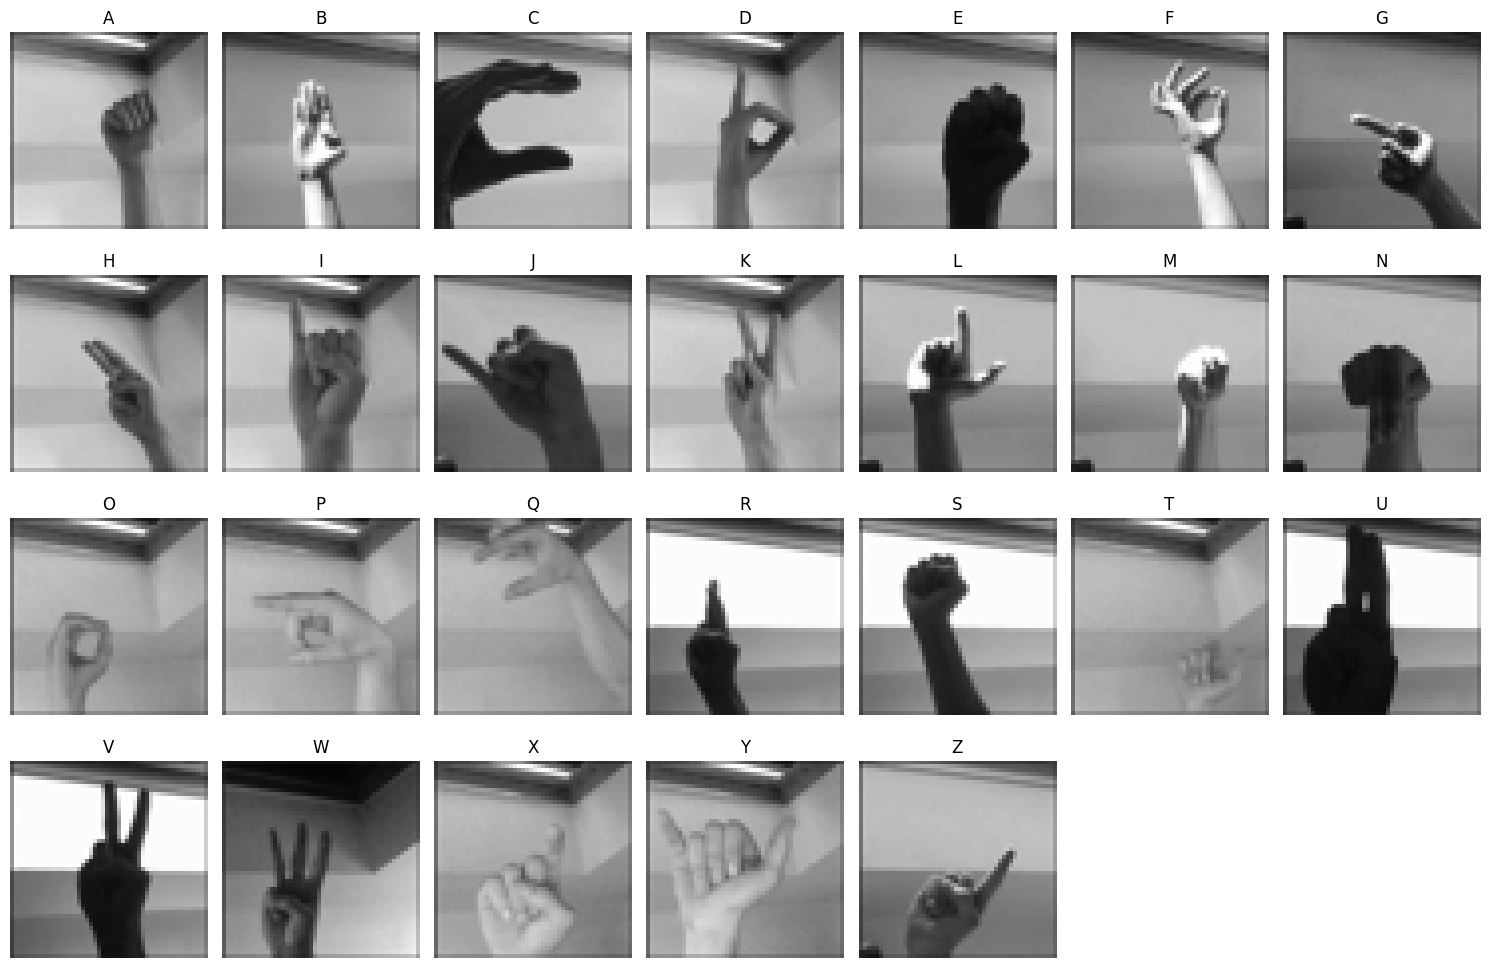

In [5]:
import matplotlib.pyplot as plt

# plot an example of every sign (from "A" to "Z")
unique_labels = sorted(set(y))
fig, axes = plt.subplots(4, 7, figsize=(15, 10))
axes = axes.flatten()

for ax, label in zip(axes, unique_labels):
    idx = y.index(label)
    img = X[idx].reshape(res)
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(label)
    ax.axis('off')

# remove extra plots
for ax in axes[len(unique_labels):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()